##### Support Vector Classifier Implemantation

---

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
# Let's create synthetic data points.
from sklearn.datasets import make_classification

In [186]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,n_classes=2, n_clusters_per_class=1)

In [187]:
X

array([[ 1.07075253, -0.9852289 ],
       [ 0.18468168, -0.98877655],
       [ 0.94727581,  1.43632858],
       ...,
       [ 0.22779062, -0.96370807],
       [ 0.64988639,  0.61365514],
       [ 0.68290119, -0.96759832]], shape=(1000, 2))

In [188]:
y[:50]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1])

<Axes: xlabel='0', ylabel='1'>

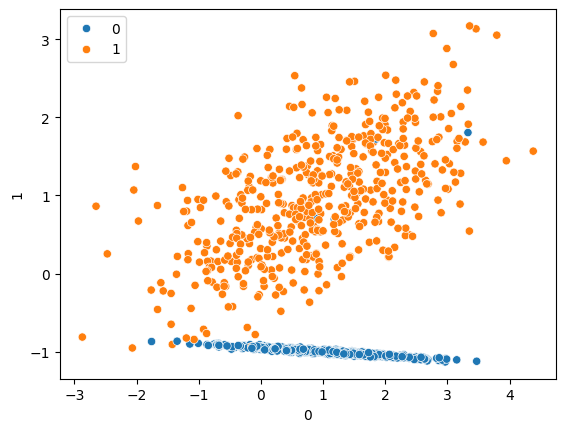

In [189]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [192]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [190]:
# Let's use Linear SVC
from sklearn.svm import SVC

In [191]:
svc = SVC(kernel='linear')

In [194]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [195]:
y_pred = svc.predict(X_test)

In [196]:
# Lets check performance
from sklearn.metrics import confusion_matrix, classification_report

In [197]:
print('Values of Accuracy and Recall: ', classification_report(y_pred, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred, y_test))

Values of Accuracy and Recall:                precision    recall  f1-score   support

           0       0.99      0.97      0.98       136
           1       0.98      0.99      0.98       164

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Confusion Matrix:  [[132   4]
 [  1 163]]


The dataset was linearly seperable so we used `linear` kernal and got the Accuracy to be $98$%.

But What if the Dataset is not Linearly seperable?

---

##### We can use `rbf` kernal:

In [198]:
# Create a overlapping dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

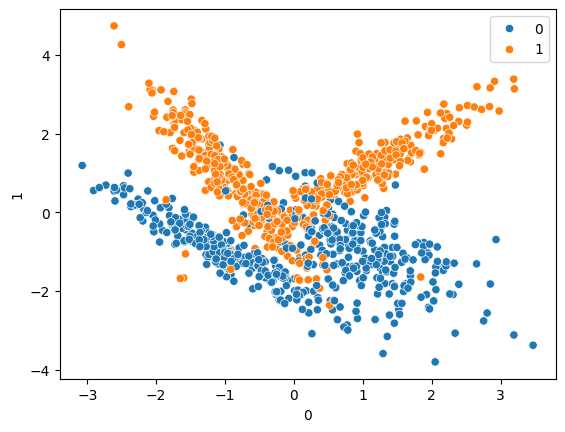

In [199]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [201]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [203]:
# Fit a model with kernal='rbf'
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

svc.fit(X_train, y_train)

y_pred1 = svc.predict(X_test)

In [204]:
# Lets check the accuracy
from sklearn.metrics import confusion_matrix, classification_report

print('Values of Accuracy, Precision, and Recall: ', classification_report(y_pred1, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred1, y_test))

Values of Accuracy, Precision, and Recall:                precision    recall  f1-score   support

           0       0.90      0.91      0.91       153
           1       0.90      0.90      0.90       147

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

Confusion Matrix:  [[139  14]
 [ 15 132]]


Accuracy with `rbf` kernal is $90$%.

---

Let's Try another kernals like `polynomial`, and `sigmoid`:

In [205]:
poly = SVC(kernel='poly')

poly.fit(X_train, y_train)

y_pred2 = poly.predict(X_test)

In [206]:
# measure the accuracy

print('Values of Accuracy, Precision, and Recall:\n', classification_report(y_pred2, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_pred2, y_test))

Values of Accuracy, Precision, and Recall:
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       130
           1       0.93      0.80      0.86       170

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.87      0.85      0.85       300

Confusion Matrix: 
 [[120  10]
 [ 34 136]]


With `polynomial` kernal we got accuracy of $85$%.

---

Now, `Sigmoid`:

In [207]:
sigmoid = SVC(kernel='sigmoid')

sigmoid.fit(X_train, y_train)

y_pred3 = sigmoid.predict(X_test)

In [217]:
# Measure the performance with sigmoid
print('Values of Accuracy, Precision, and Recall: \n', classification_report(y_pred3, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_pred3, y_test))

Values of Accuracy, Precision, and Recall: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       159
           1       0.73      0.76      0.75       141

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300

Confusion Matrix: 
 [[120  39]
 [ 34 107]]


With `Sigmoid` we got the accuracy of $75$%. This proves that for non-linear data `rbf` undeniably better then other kernals.

---

##### Hyperparameter Tuning:

In [211]:
from sklearn.model_selection import GridSearchCV

# defining the parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

gridcv = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, verbose=3, refit=True)

In [212]:
gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [ ]:
print(f'Best Parameters: {gridcv.best_params_}')
print(f'Best score: {gridcv.best_score_}')

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Parameters: 0.937142857142857


In [215]:
y_pred4 = gridcv.predict(X_test)

In [216]:
# Measure the performance with gridcv
print('Values of Accuracy, Precision, and Recall: \n', classification_report(y_pred4, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_pred4, y_test))

Values of Accuracy, Precision, and Recall: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       148
           1       0.92      0.89      0.91       152

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

Confusion Matrix: 
 [[137  11]
 [ 17 135]]


Originally the model had accuracy of $90$% percent with `rbs` kernel.

After hyperparameter tuning we get accuracy increase by 1% the is we have now accuracy of $91$%